# Flight Fare Prediction

## Problem Statement
The objective of the study is to analyse the flight booking dataset obtained from “Ease My Trip” website and to conduct various statistical hypothesis tests in order to get meaningful information from it. The 'Linear Regression' statistical algorithm would be used to train the dataset and predict a continuous target variable. 'Easemytrip' is an internet platform for booking flight tickets, and hence a platform that potential passengers use to buy tickets. A thorough study of the data will aid in the discovery of valuable insights that will be of enormous value to passengers.n

In [1]:
import pandas as pd
import numpy as np
import matplotlib as plt
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [2]:
#Import training dataset
train_data = pd.read_excel('Data_Train.xlsx')
train_data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [3]:
train_data.dtypes

Airline            object
Date_of_Journey    object
Source             object
Destination        object
Route              object
Dep_Time           object
Arrival_Time       object
Duration           object
Total_Stops        object
Additional_Info    object
Price               int64
dtype: object

In [4]:
train_data.shape

(10683, 11)

In [5]:
train_data.describe()

,Price
count,10683.000000
mean,9087.064121
std,4611.359167
min,1759.000000
25%,5277.000000
50%,8372.000000
75%,12373.000000
max,79512.000000


In [6]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [7]:
train_data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

<AxesSubplot:>

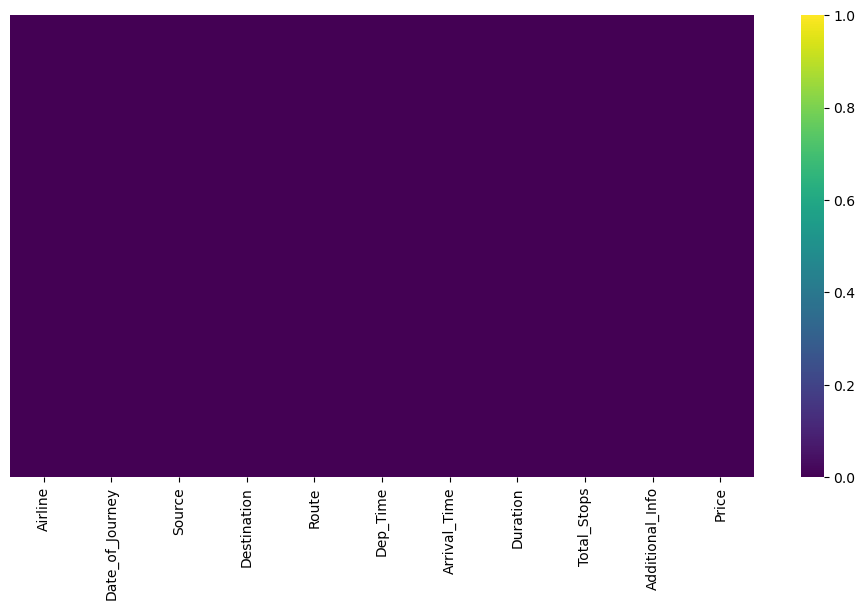

In [8]:
import matplotlib
matplotlib.rcParams['figure.figsize'] = (12, 6)

sns.heatmap(train_data.isnull(), yticklabels= False, cbar = True, cmap = 'viridis')

# EDA

In [9]:
train_data['Airline'].value_counts()

Jet Airways                          3849
IndiGo                               2053
Air India                            1752
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

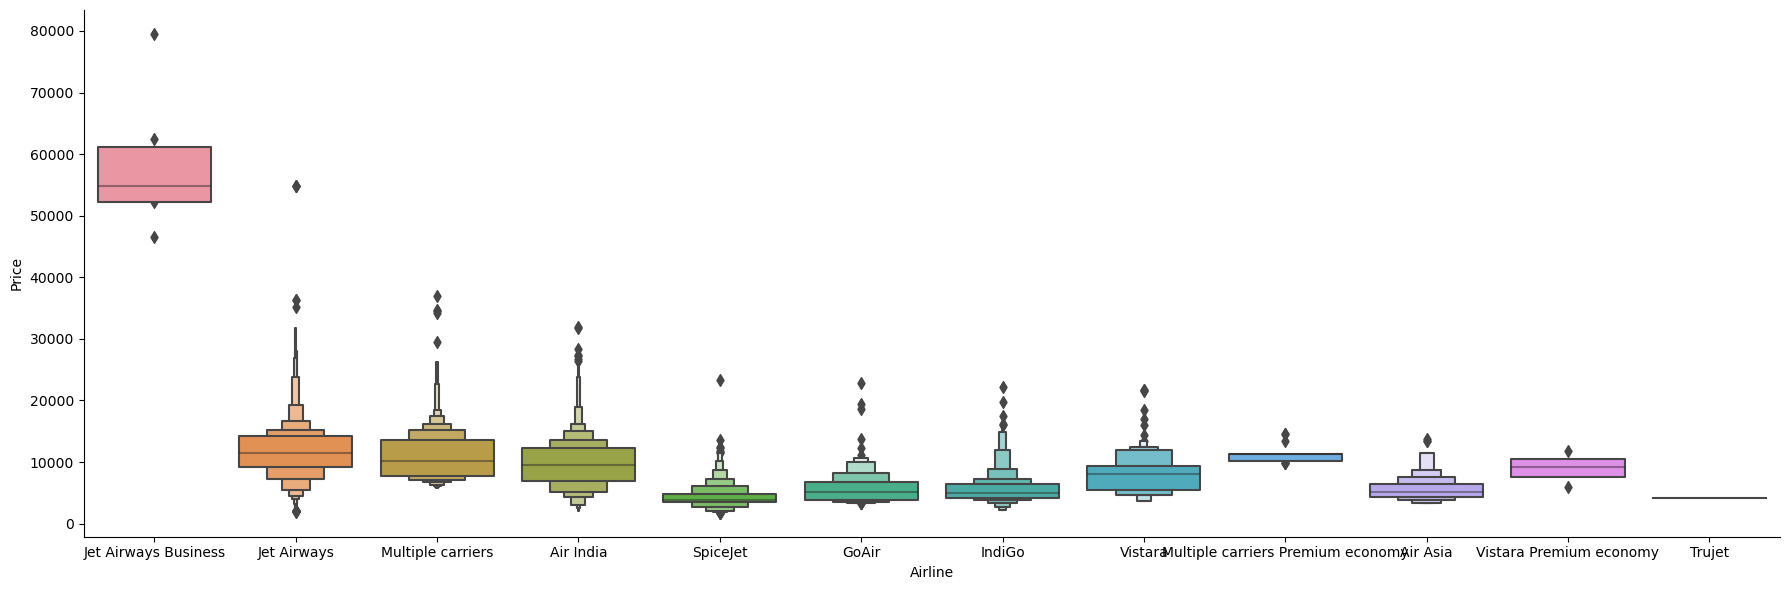

In [10]:
# Airline vs Price
sns.catplot(y = "Price", x = "Airline", data = train_data.sort_values("Price", ascending = False), kind="boxen", height = 6, aspect = 3)
plt.show()

 From graph we can see that Jet Airways Business have the highest Price.
 Apart from the first Airline almost all are having similar median

In [11]:
train_data.groupby(['Airline','Destination']).size().reset_index()

,Airline,Destination,0
0,Air Asia,Banglore,150
1,Air Asia,Cochin,80
2,Air Asia,Delhi,71
3,Air Asia,New Delhi,18
4,Air India,Banglore,512
5,Air India,Cochin,747
6,Air India,Delhi,120
7,Air India,Hyderabad,136
8,Air India,Kolkata,25
9,Air India,New Delhi,212


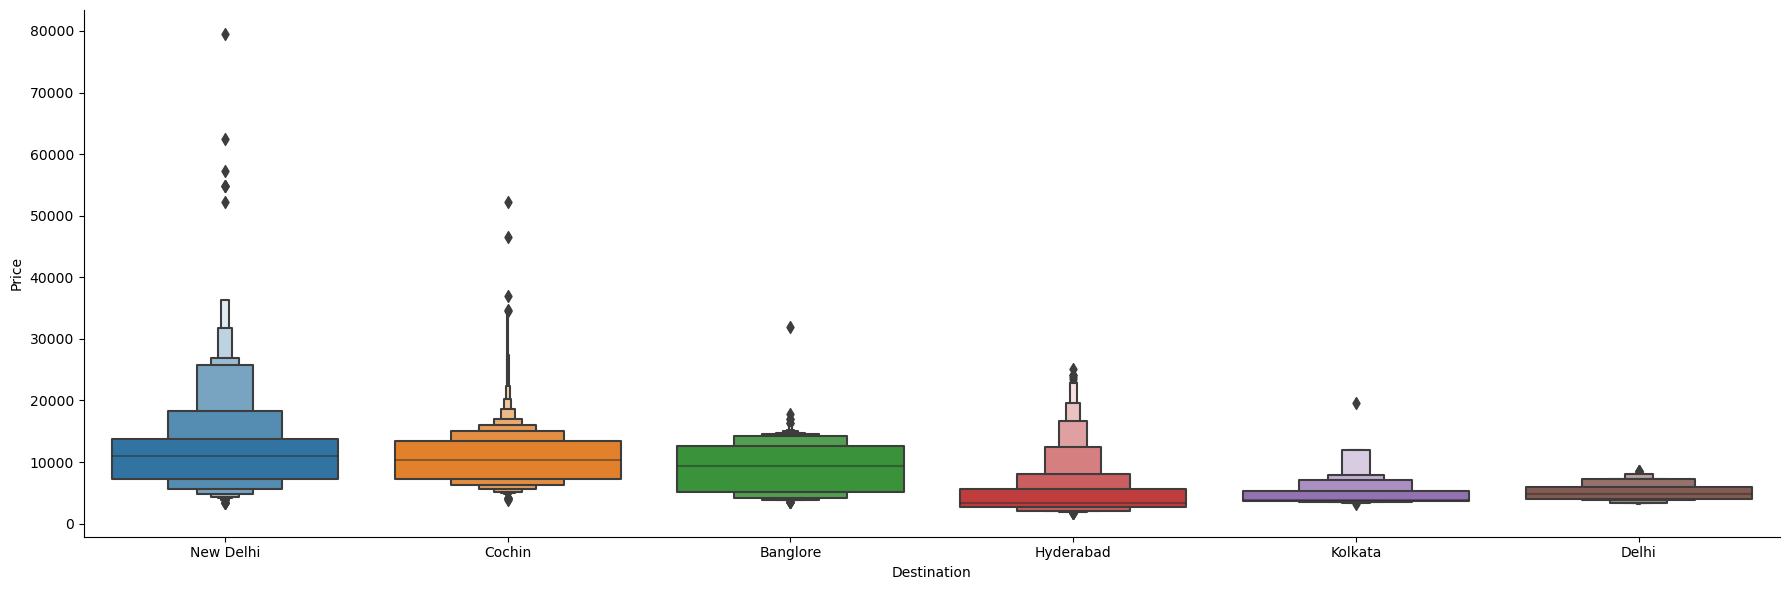

In [12]:
# Price vs Destination
sns.catplot(y = "Price", x = "Destination", data = train_data.sort_values("Price", ascending = False), kind="boxen", height = 6, aspect = 3)
plt.show()

### Changing Date Format

In [13]:
# train_data['day'] = train_data['Date_of_Journey'].str.split('/').str[0]
# train_data['month'] = train_data['Date_of_Journey'].str.split('/').str[1]
# train_data['year'] = train_data['Date_of_Journey'].str.split('/').str[2]

train_data['day'] = train_data['Date_of_Journey'].apply(lambda x:x.split('/')[0])
train_data['month'] = train_data['Date_of_Journey'].apply(lambda x:x.split('/')[1])
train_data['year'] = train_data['Date_of_Journey'].apply(lambda x:x.split('/')[2])

In [14]:
train_data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,day,month,year
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,03,2019
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,05,2019
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,06,2019
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,05,2019
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,01,03,2019


In [15]:
train_data['day'] = train_data['day'].astype(int)
train_data['month'] = train_data['month'].astype(int)
train_data['year'] = train_data['year'].astype(int)

In [16]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
 11  day              10683 non-null  int64 
 12  month            10683 non-null  int64 
 13  year             10683 non-null  int64 
dtypes: int64(4), object(10)
memory usage: 1.1+ MB


In [17]:
train_data.drop('Date_of_Journey',axis = 1, inplace = True)

In [18]:
train_data['Arrival_Time'] = train_data['Arrival_Time'].apply(lambda x:x.split(' ')[0])

In [19]:
train_data['Arrival_hour'] = train_data['Arrival_Time'].apply(lambda x:x.split(':')[0])
train_data['Arrival_minutes'] = train_data['Arrival_Time'].apply(lambda x:x.split(':')[1])

In [20]:
train_data['Arrival_hour'] = train_data['Arrival_hour'].astype(int)
train_data['Arrival_minutes'] = train_data['Arrival_minutes'].astype(int)

In [21]:
train_data.drop('Arrival_Time',axis = 1, inplace = True)

In [22]:
train_data.head()

,Airline,Source,Destination,Route,Dep_Time,Duration,Total_Stops,Additional_Info,Price,day,month,year,Arrival_hour,Arrival_minutes
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,2h 50m,non-stop,No info,3897,24,3,2019,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,7h 25m,2 stops,No info,7662,1,5,2019,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,19h,2 stops,No info,13882,9,6,2019,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,5h 25m,1 stop,No info,6218,12,5,2019,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,4h 45m,1 stop,No info,13302,1,3,2019,21,35


In [23]:
# data['Arrival_Time'] = data['Arrival_Time'].apply(lambda x:x.split(' ')[0])

train_data['Dept_hour'] = train_data['Dep_Time'].apply(lambda x:x.split(':')[0])
train_data['Dept_minutes'] = train_data['Dep_Time'].apply(lambda x:x.split(':')[1])

train_data['Dept_hour'] = train_data['Dept_hour'].astype(int)
train_data['Dept_minutes'] = train_data['Dept_minutes'].astype(int)

train_data.drop('Dep_Time',axis = 1, inplace = True)

In [24]:
train_data.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,day,month,year,Arrival_hour,Arrival_minutes,Dept_hour,Dept_minutes
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,2019,1,10,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,5,2019,13,15,5,50
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,9,6,2019,4,25,9,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,12,5,2019,23,30,18,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,1,3,2019,21,35,16,50


In [25]:
train_data.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,day,month,year,Arrival_hour,Arrival_minutes,Dept_hour,Dept_minutes
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,2019,1,10,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,5,2019,13,15,5,50
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,9,6,2019,4,25,9,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,12,5,2019,23,30,18,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,1,3,2019,21,35,16,50


In [26]:
train_data['Route'].value_counts()

DEL → BOM → COK          2376
BLR → DEL                1552
CCU → BOM → BLR           979
CCU → BLR                 724
BOM → HYD                 621
                         ... 
CCU → VTZ → BLR             1
CCU → IXZ → MAA → BLR       1
BOM → COK → MAA → HYD       1
BOM → CCU → HYD             1
BOM → BBI → HYD             1
Name: Route, Length: 128, dtype: int64

In [27]:
train_data['Total_Stops'].unique()

array(['non-stop', '2 stops', '1 stop', '3 stops', nan, '4 stops'],
      dtype=object)

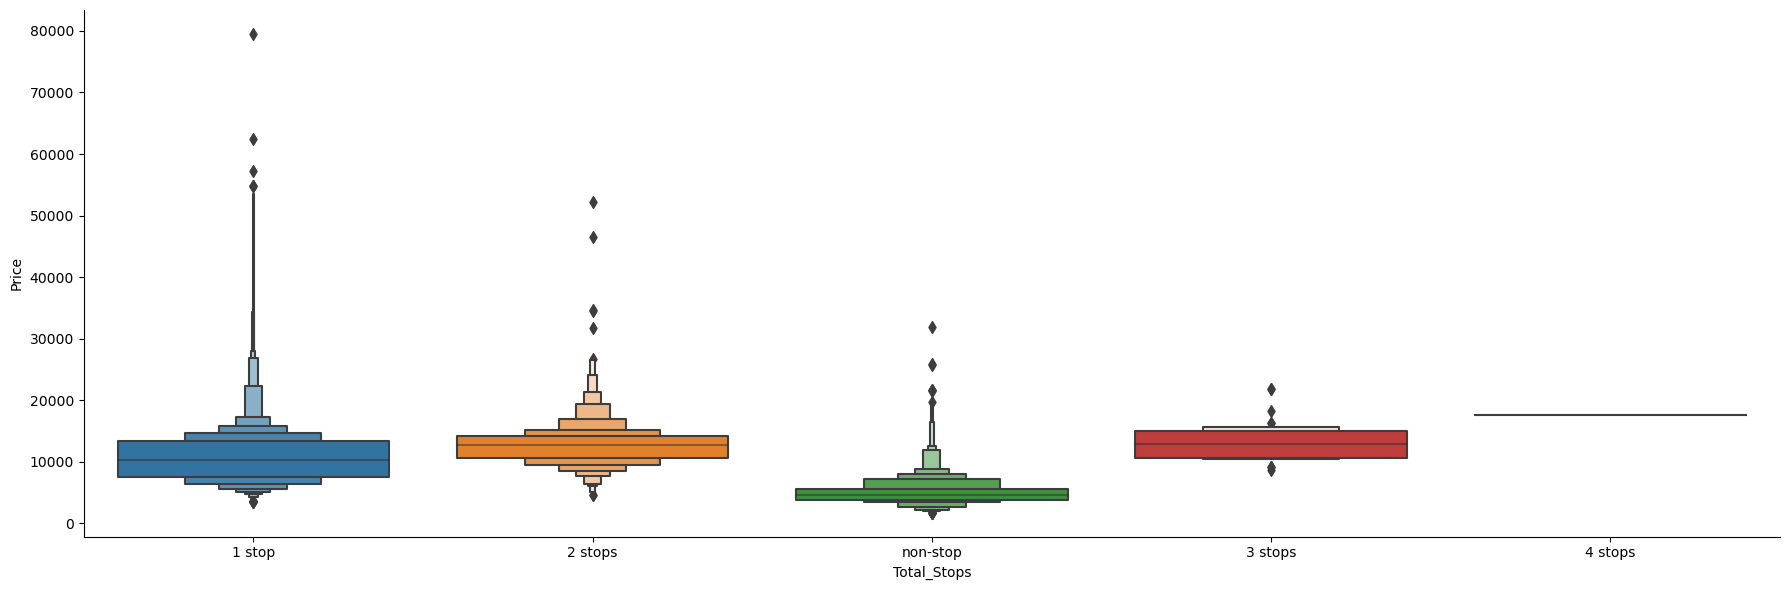

In [28]:
# Price vs Total Stops

sns.catplot(y = "Price", x = "Total_Stops", data = train_data.sort_values("Price", ascending = False), kind="boxen", height = 6, aspect = 3)
plt.show()

In [29]:
# #Graph of Total_Stops vs Price
# sns.catplot(y='Price', x='Total_Stops', train_data=train_data.sort_values('Price', ascending=False), kind='boxen', height=6, aspect=3)
# plt.show()

In [30]:
train_data[train_data['Total_Stops'].isnull()]

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,day,month,year,Arrival_hour,Arrival_minutes,Dept_hour,Dept_minutes
9039,Air India,Delhi,Cochin,NaN,23h 40m,NaN,No info,7480,6,5,2019,9,25,9,45


Only one nan value is present

In [31]:
# Instead of Focusing on 'Route' we will focus on 'Total_Stops' coz its easy and the ticket price would drastically change 
# if there are multiple stops.
# we replace nan value with one coz from Delhi to Cochin there would atleast be 1 stop and only 1 nan value is present so it would not get affect a lot

train_data['Total_Stops'] = train_data['Total_Stops'].map({'non-stop':0, '2 stops':1, '1 stop' : 2, '3 stops' : 3, '4 stops' : 4, 'nan' : 1})

In [32]:
# Additional_Info contains almost 80% no_info
# Route and Total_Stops are related to each other

train_data.drop(["Route", "Additional_Info"], axis = 1, inplace = True)

In [33]:
train_data.head()

,Airline,Source,Destination,Duration,Total_Stops,Price,day,month,year,Arrival_hour,Arrival_minutes,Dept_hour,Dept_minutes
0,IndiGo,Banglore,New Delhi,2h 50m,0.0,3897,24,3,2019,1,10,22,20
1,Air India,Kolkata,Banglore,7h 25m,1.0,7662,1,5,2019,13,15,5,50
2,Jet Airways,Delhi,Cochin,19h,1.0,13882,9,6,2019,4,25,9,25
3,IndiGo,Kolkata,Banglore,5h 25m,2.0,6218,12,5,2019,23,30,18,5
4,IndiGo,Banglore,New Delhi,4h 45m,2.0,13302,1,3,2019,21,35,16,50


# Change Duration to minutes

In [34]:
train_data.head()

,Airline,Source,Destination,Duration,Total_Stops,Price,day,month,year,Arrival_hour,Arrival_minutes,Dept_hour,Dept_minutes
0,IndiGo,Banglore,New Delhi,2h 50m,0.0,3897,24,3,2019,1,10,22,20
1,Air India,Kolkata,Banglore,7h 25m,1.0,7662,1,5,2019,13,15,5,50
2,Jet Airways,Delhi,Cochin,19h,1.0,13882,9,6,2019,4,25,9,25
3,IndiGo,Kolkata,Banglore,5h 25m,2.0,6218,12,5,2019,23,30,18,5
4,IndiGo,Banglore,New Delhi,4h 45m,2.0,13302,1,3,2019,21,35,16,50


In [35]:
train_data.dtypes

Airline             object
Source              object
Destination         object
Duration            object
Total_Stops        float64
Price                int64
day                  int64
month                int64
year                 int64
Arrival_hour         int64
Arrival_minutes      int64
Dept_hour            int64
Dept_minutes         int64
dtype: object

In [36]:
#******************************************************

# 'Duration'--> Time taken by plane to reach destination.
# It is the differnce between Departure time and Arrival time


# Assigning and converting Duration column into list to extract values one-by-one in for-loop
duration = list(train_data["Duration"])

for i in range(len(duration)):
    if len(duration[i].split()) != 2:    # Check if duration contains only hour or mins
        if "h" in duration[i]:
            duration[i] = duration[i].strip() + " 0m"   # Adds 0 minute #why strip is used here?
        else:
            duration[i] = "0h " + duration[i]           # Adds 0 hour

duration_hours = []
duration_mins = []
for i in range(len(duration)):
    duration_hours.append(int(duration[i].split(sep = "h")[0]))    # Extract hours from duration
    duration_mins.append(int(duration[i].split(sep = "m")[0].split()[-1]))   # Extracts only minutes from duration

In [37]:
#adding columns 'Duration_hours' and 'Duration_minutes' into dataset 'train_data'
train_data['Duration_hours'] = duration_hours
train_data['Duration_minutes'] = duration_mins

#get first 5 rows
train_data.head()

,Airline,Source,Destination,Duration,Total_Stops,Price,day,month,year,Arrival_hour,Arrival_minutes,Dept_hour,Dept_minutes,Duration_hours,Duration_minutes
0,IndiGo,Banglore,New Delhi,2h 50m,0.0,3897,24,3,2019,1,10,22,20,2,50
1,Air India,Kolkata,Banglore,7h 25m,1.0,7662,1,5,2019,13,15,5,50,7,25
2,Jet Airways,Delhi,Cochin,19h,1.0,13882,9,6,2019,4,25,9,25,19,0
3,IndiGo,Kolkata,Banglore,5h 25m,2.0,6218,12,5,2019,23,30,18,5,5,25
4,IndiGo,Banglore,New Delhi,4h 45m,2.0,13302,1,3,2019,21,35,16,50,4,45


In [38]:
# handling nan values in duration_mins

train_data.isnull().sum()

Airline             0
Source              0
Destination         0
Duration            0
Total_Stops         1
Price               0
day                 0
month               0
year                0
Arrival_hour        0
Arrival_minutes     0
Dept_hour           0
Dept_minutes        0
Duration_hours      0
Duration_minutes    0
dtype: int64

In [39]:

train_data.dropna(subset = ['Total_Stops'], inplace=True)


In [40]:
# handling nan values in duration_mins

train_data.isnull().sum()

Airline             0
Source              0
Destination         0
Duration            0
Total_Stops         0
Price               0
day                 0
month               0
year                0
Arrival_hour        0
Arrival_minutes     0
Dept_hour           0
Dept_minutes        0
Duration_hours      0
Duration_minutes    0
dtype: int64

In [41]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10682 entries, 0 to 10682
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Airline           10682 non-null  object 
 1   Source            10682 non-null  object 
 2   Destination       10682 non-null  object 
 3   Duration          10682 non-null  object 
 4   Total_Stops       10682 non-null  float64
 5   Price             10682 non-null  int64  
 6   day               10682 non-null  int64  
 7   month             10682 non-null  int64  
 8   year              10682 non-null  int64  
 9   Arrival_hour      10682 non-null  int64  
 10  Arrival_minutes   10682 non-null  int64  
 11  Dept_hour         10682 non-null  int64  
 12  Dept_minutes      10682 non-null  int64  
 13  Duration_hours    10682 non-null  int64  
 14  Duration_minutes  10682 non-null  int64  
dtypes: float64(1), int64(10), object(4)
memory usage: 1.3+ MB


In [42]:
train_data.drop('Duration',axis = 1, inplace = True)

In [43]:
train_data.head()

,Airline,Source,Destination,Total_Stops,Price,day,month,year,Arrival_hour,Arrival_minutes,Dept_hour,Dept_minutes,Duration_hours,Duration_minutes
0,IndiGo,Banglore,New Delhi,0.0,3897,24,3,2019,1,10,22,20,2,50
1,Air India,Kolkata,Banglore,1.0,7662,1,5,2019,13,15,5,50,7,25
2,Jet Airways,Delhi,Cochin,1.0,13882,9,6,2019,4,25,9,25,19,0
3,IndiGo,Kolkata,Banglore,2.0,6218,12,5,2019,23,30,18,5,5,25
4,IndiGo,Banglore,New Delhi,2.0,13302,1,3,2019,21,35,16,50,4,45


In [44]:
train_data['Airline'].unique()

array(['IndiGo', 'Air India', 'Jet Airways', 'SpiceJet',
       'Multiple carriers', 'GoAir', 'Vistara', 'Air Asia',
       'Vistara Premium economy', 'Jet Airways Business',
       'Multiple carriers Premium economy', 'Trujet'], dtype=object)

## Apply various encoding methods for Airline, Source and Destination

In [45]:
# As Airline is Nominal Categorical data we will perform OneHotEncoding

Airline = train_data[["Airline"]]
Airline = pd.get_dummies(Airline, drop_first= True)
Airline.head()

,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy
0,0,0,1,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,0


In [46]:
train_data["Source"].value_counts()

Delhi       4536
Kolkata     2871
Banglore    2197
Mumbai       697
Chennai      381
Name: Source, dtype: int64

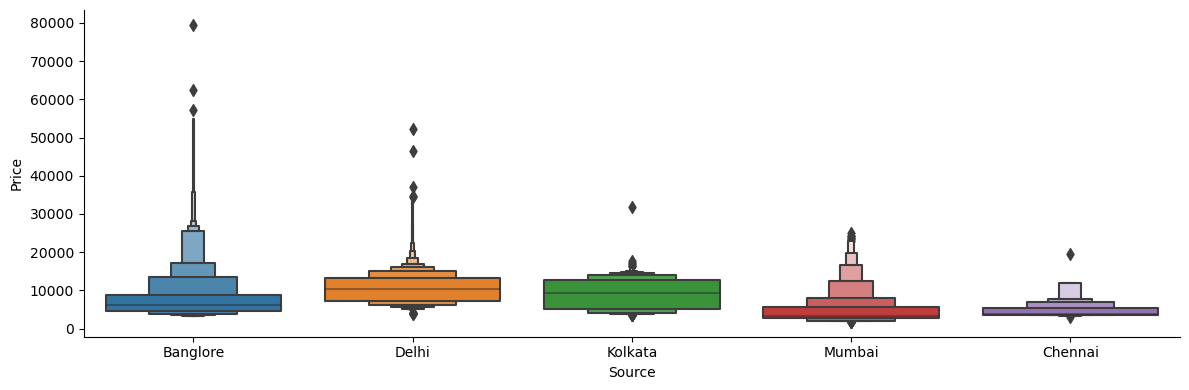

In [47]:
# Source vs Price

sns.catplot(y = "Price", x = "Source", data = train_data.sort_values("Price", ascending = False), kind="boxen", height = 4, aspect = 3)
plt.show()

In [48]:
# As Source is Nominal Categorical data we will perform OneHotEncoding

Source = train_data[["Source"]]
Source = pd.get_dummies(Source, drop_first= True)
Source.head()

,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai
0,0,0,0,0
1,0,0,1,0
2,0,1,0,0
3,0,0,1,0
4,0,0,0,0


In [49]:
train_data["Destination"].value_counts()

Cochin       4536
Banglore     2871
Delhi        1265
New Delhi     932
Hyderabad     697
Kolkata       381
Name: Destination, dtype: int64

In [50]:
# As Destination is Nominal Categorical data we will perform OneHotEncoding

Destination = train_data[["Destination"]]
Destination = pd.get_dummies(Destination, drop_first = True)
Destination.head()

,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,0,0,0,1
1,0,0,0,0,0
2,1,0,0,0,0
3,0,0,0,0,0
4,0,0,0,0,1


In [51]:
train_data.head()

,Airline,Source,Destination,Total_Stops,Price,day,month,year,Arrival_hour,Arrival_minutes,Dept_hour,Dept_minutes,Duration_hours,Duration_minutes
0,IndiGo,Banglore,New Delhi,0.0,3897,24,3,2019,1,10,22,20,2,50
1,Air India,Kolkata,Banglore,1.0,7662,1,5,2019,13,15,5,50,7,25
2,Jet Airways,Delhi,Cochin,1.0,13882,9,6,2019,4,25,9,25,19,0
3,IndiGo,Kolkata,Banglore,2.0,6218,12,5,2019,23,30,18,5,5,25
4,IndiGo,Banglore,New Delhi,2.0,13302,1,3,2019,21,35,16,50,4,45


In [52]:
# Concatenate Airline,Source and Destination into train_dataset

train_dataset = pd.concat([train_data, Airline, Source, Destination], axis = 1)

In [53]:
train_dataset.head()

,Airline,Source,Destination,Total_Stops,Price,day,month,year,Arrival_hour,Arrival_minutes,...,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,IndiGo,Banglore,New Delhi,0.0,3897,24,3,2019,1,10,...,0,0,0,0,0,0,0,0,0,1
1,Air India,Kolkata,Banglore,1.0,7662,1,5,2019,13,15,...,0,0,0,1,0,0,0,0,0,0
2,Jet Airways,Delhi,Cochin,1.0,13882,9,6,2019,4,25,...,0,0,1,0,0,1,0,0,0,0
3,IndiGo,Kolkata,Banglore,2.0,6218,12,5,2019,23,30,...,0,0,0,1,0,0,0,0,0,0
4,IndiGo,Banglore,New Delhi,2.0,13302,1,3,2019,21,35,...,0,0,0,0,0,0,0,0,0,1


In [54]:
train_dataset.drop(["Airline", "Source", "Destination","year"], axis = 1, inplace = True)

In [55]:
train_dataset.head()

,Total_Stops,Price,day,month,Arrival_hour,Arrival_minutes,Dept_hour,Dept_minutes,Duration_hours,Duration_minutes,...,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0.0,3897,24,3,1,10,22,20,2,50,...,0,0,0,0,0,0,0,0,0,1
1,1.0,7662,1,5,13,15,5,50,7,25,...,0,0,0,1,0,0,0,0,0,0
2,1.0,13882,9,6,4,25,9,25,19,0,...,0,0,1,0,0,1,0,0,0,0
3,2.0,6218,12,5,23,30,18,5,5,25,...,0,0,0,1,0,0,0,0,0,0
4,2.0,13302,1,3,21,35,16,50,4,45,...,0,0,0,0,0,0,0,0,0,1


In [56]:
train_dataset.shape

(10682, 30)

# Test dataset

In [57]:
test_data = pd.read_excel('Test_set.xlsx')

In [58]:
test_data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info


In [59]:
#importing data
test_data = pd.read_excel(r'Test_set.xlsx')

#********************************************************************

#DATA PREPROCESSING

#number of rows and columns in a dataset
test_data.shape

#checking number of missing values
test_data.isnull().sum()

#Route--> null values=1 and Total_Stops--> null values=1, so we can ignore them
test_data.dropna(inplace=True)
#now check again
test_data.isnull().sum()

#statistical analysis(description)
test_data.describe()

#********************************************************************

#EXPLORATORY DATA ANALYSIS

#converting to 'datetime'
test_data['Date_of_Journey'] = pd.to_datetime(test_data.Date_of_Journey, format='%d/%m/%Y')

#adding new columns(Journey_day, Journey_month, Journey_year) out of column(Date_of_Journey)
#extracting day
test_data['Journey_day'] = test_data['Date_of_Journey'].dt.day
#extracting month
test_data['Journey_month'] = test_data['Date_of_Journey'].dt.month

#drop column 'Date_of_Journey' as it's of no use now
test_data.drop(['Date_of_Journey'], axis=1, inplace=True)

#converting 'Arrival_Time' to 'datetime'
test_data['Arrival_Time'] = pd.to_datetime(test_data.Arrival_Time)

#adding new columns(Arrival_hour, Arrival_minute)
#extracting Arrival hour
test_data['Arrival_hour'] = test_data['Arrival_Time'].dt.hour
#extracting Arrival minute
test_data['Arrival_minute'] = test_data['Arrival_Time'].dt.minute

#drop column 'Arrival_Time' as it's of no use now
test_data.drop(['Arrival_Time'], axis=1, inplace=True)

#converting 'Dep_Time' to 'datetime'
test_data['Dep_Time'] = pd.to_datetime(test_data.Dep_Time)

#adding new columns(Dep_hour, Dep_minute)
#extracting Depature hour
test_data['Dep_hour'] = test_data['Dep_Time'].dt.hour
#extracting Departure minute
test_data['Dep_minute'] = test_data['Dep_Time'].dt.minute

#drop column 'Dep_Time' as it's of no use now
test_data.drop(['Dep_Time'], axis=1, inplace=True)

# 'Duration'--> Time taken by plane to reach destination.
# It is the differnce between Departure time and Arrival time

# Assigning and converting Duration column into list to extract values one-by-one in for-loop
duration = list(test_data["Duration"])

for i in range(len(duration)):
    if len(duration[i].split()) != 2:    # Check if duration contains only hour or mins
        if "h" in duration[i]:
            duration[i] = duration[i].strip() + " 0m"   # Adds 0 minute #why strip is used here?
        else:
            duration[i] = "0h " + duration[i]           # Adds 0 hour

duration_hours = []
duration_mins = []
for i in range(len(duration)):
    duration_hours.append(int(duration[i].split(sep = "h")[0]))    # Extract hours from duration
    duration_mins.append(int(duration[i].split(sep = "m")[0].split()[-1]))   # Extracts only minutes from duration
    
#adding columns 'Duration_hours' and 'Duration_minutes' into dataset 'train_data'
test_data['Duration_hours'] = duration_hours
test_data['Duration_minutes'] = duration_mins

#drop column 'Duration' as it's of no use now
test_data.drop(['Duration'], axis=1, inplace=True)

#********************************************************************

#HANDLING CATEGORICAL DATA

#checking distribution of categorical data(Airline)
print(test_data.Airline.value_counts(),"\n")

#As Airline--> Nominal Categorical Data, so we perform 'OneHotEncoding'
#make a dataframe named 'Airline'
Airline = test_data['Airline']
Airline = pd.get_dummies(Airline, drop_first=True)

#checking distribution of categorical data(Source)
print(test_data.Source.value_counts(),"\n")

#As Source--> Nominal Categorical Data, so we perform 'OneHotEncoding'
#make a dataframe named 'Source'
Source = test_data['Source']
Source = pd.get_dummies(Source, drop_first=True)

#checking distribution of categorical data(Destination)
print(test_data.Destination.value_counts(),"\n")

#As Destination--> Nominal Categorical Data, so we perform 'OneHotEncoding'
#make a dataframe named 'Destination'
Destination = test_data['Destination']
Destination = pd.get_dummies(Destination, drop_first=True)

#checking distribution of categorical data(Route)
test_data['Route'].value_counts()

#as 'Total_Stops' and 'Route' are related(dependent on) to each other, so we can drop 'Route'.
test_data.drop(['Route'], axis=1, inplace=True)

#checking distribution of categorical data(Total_Stops)
print(train_data.Total_Stops.value_counts(),"\n")

#As Total_Stops --> Ordinal Categorical Data, so we perform 'LabelEncoding'
#we assign values in 'Total_Stops' with corresponding keys.
test_data.replace({'Total_Stops':{'non-stop': 0, '1 stop': 1, '2 stops': 2, '3 stops': 3, '4 stops': 4}},inplace=True)
test_data.head()

#checking distribution of categorical data(Additional_Info)
print(test_data.Additional_Info.value_counts(),"\n")

#as 80% of information in 'Additional_Info' is 'No info', hence we can drop this column
test_data.drop(['Additional_Info'], axis=1, inplace=True)

#conactenate dataframe--> (train_data, Airline, Source, Destination)
test_data = pd.concat([test_data, Airline, Source, Destination], axis=1)


#drop columns 'Airline, Source, Destination' as these are now of no further use
test_data.drop(['Airline', 'Source', 'Destination'], axis=1, inplace=True)

#shape of dataframe 'train_data'
print(test_data.shape)

#check which two(30-28=2) columns are missing in 'test_data'
print(test_data.columns)
print(train_data.columns)


#print first 5 rows
test_data.head()

Jet Airways                          897
IndiGo                               511
Air India                            440
Multiple carriers                    347
SpiceJet                             208
Vistara                              129
Air Asia                              86
GoAir                                 46
Multiple carriers Premium economy      3
Vistara Premium economy                2
Jet Airways Business                   2
Name: Airline, dtype: int64 

Delhi       1145
Kolkata      710
Banglore     555
Mumbai       186
Chennai       75
Name: Source, dtype: int64 

Cochin       1145
Banglore      710
Delhi         317
New Delhi     238
Hyderabad     186
Kolkata        75
Name: Destination, dtype: int64 

2.0    5625
0.0    3491
1.0    1520
3.0      45
4.0       1
Name: Total_Stops, dtype: int64 

No info                         2148
In-flight meal not included      444
No check-in baggage included      76
1 Long layover                     1
Business class       

,Total_Stops,Journey_day,Journey_month,Arrival_hour,Arrival_minute,Dep_hour,Dep_minute,Duration_hours,Duration_minutes,Air India,...,Vistara Premium economy,Chennai,Delhi,Kolkata,Mumbai,Cochin,Delhi,Hyderabad,Kolkata,New Delhi
0,1,6,6,4,25,17,30,10,55,0,...,0,0,1,0,0,1,0,0,0,0
1,1,12,5,10,20,6,20,4,0,0,...,0,0,0,1,0,0,0,0,0,0
2,1,21,5,19,0,19,15,23,45,0,...,0,0,1,0,0,1,0,0,0,0
3,1,21,5,21,0,8,0,13,0,0,...,0,0,1,0,0,1,0,0,0,0
4,0,24,6,2,45,23,55,2,50,0,...,0,0,0,0,0,0,1,0,0,0


In [60]:
test_data.head()

,Total_Stops,Journey_day,Journey_month,Arrival_hour,Arrival_minute,Dep_hour,Dep_minute,Duration_hours,Duration_minutes,Air India,...,Vistara Premium economy,Chennai,Delhi,Kolkata,Mumbai,Cochin,Delhi,Hyderabad,Kolkata,New Delhi
0,1,6,6,4,25,17,30,10,55,0,...,0,0,1,0,0,1,0,0,0,0
1,1,12,5,10,20,6,20,4,0,0,...,0,0,0,1,0,0,0,0,0,0
2,1,21,5,19,0,19,15,23,45,0,...,0,0,1,0,0,1,0,0,0,0
3,1,21,5,21,0,8,0,13,0,0,...,0,0,1,0,0,1,0,0,0,0
4,0,24,6,2,45,23,55,2,50,0,...,0,0,0,0,0,0,1,0,0,0


# Feature Selection

In [61]:
train_dataset.shape

(10682, 30)

In [62]:
train_data.drop('year', inplace = True, axis = 1)

In [63]:
train_dataset.columns

Index(['Total_Stops', 'Price', 'day', 'month', 'Arrival_hour',
       'Arrival_minutes', 'Dept_hour', 'Dept_minutes', 'Duration_hours',
       'Duration_minutes', 'Airline_Air India', 'Airline_GoAir',
       'Airline_IndiGo', 'Airline_Jet Airways', 'Airline_Jet Airways Business',
       'Airline_Multiple carriers',
       'Airline_Multiple carriers Premium economy', 'Airline_SpiceJet',
       'Airline_Trujet', 'Airline_Vistara', 'Airline_Vistara Premium economy',
       'Source_Chennai', 'Source_Delhi', 'Source_Kolkata', 'Source_Mumbai',
       'Destination_Cochin', 'Destination_Delhi', 'Destination_Hyderabad',
       'Destination_Kolkata', 'Destination_New Delhi'],
      dtype='object')

In [64]:
#divide 'train_data' into 'X=independent feature(columns)' and 'Y=dependent/target feature'
X = train_dataset.drop(['Price'], axis=1)
Y = train_dataset['Price']

#print X and Y
X.head()
Y.head()

0     3897
1     7662
2    13882
3     6218
4    13302
Name: Price, dtype: int64

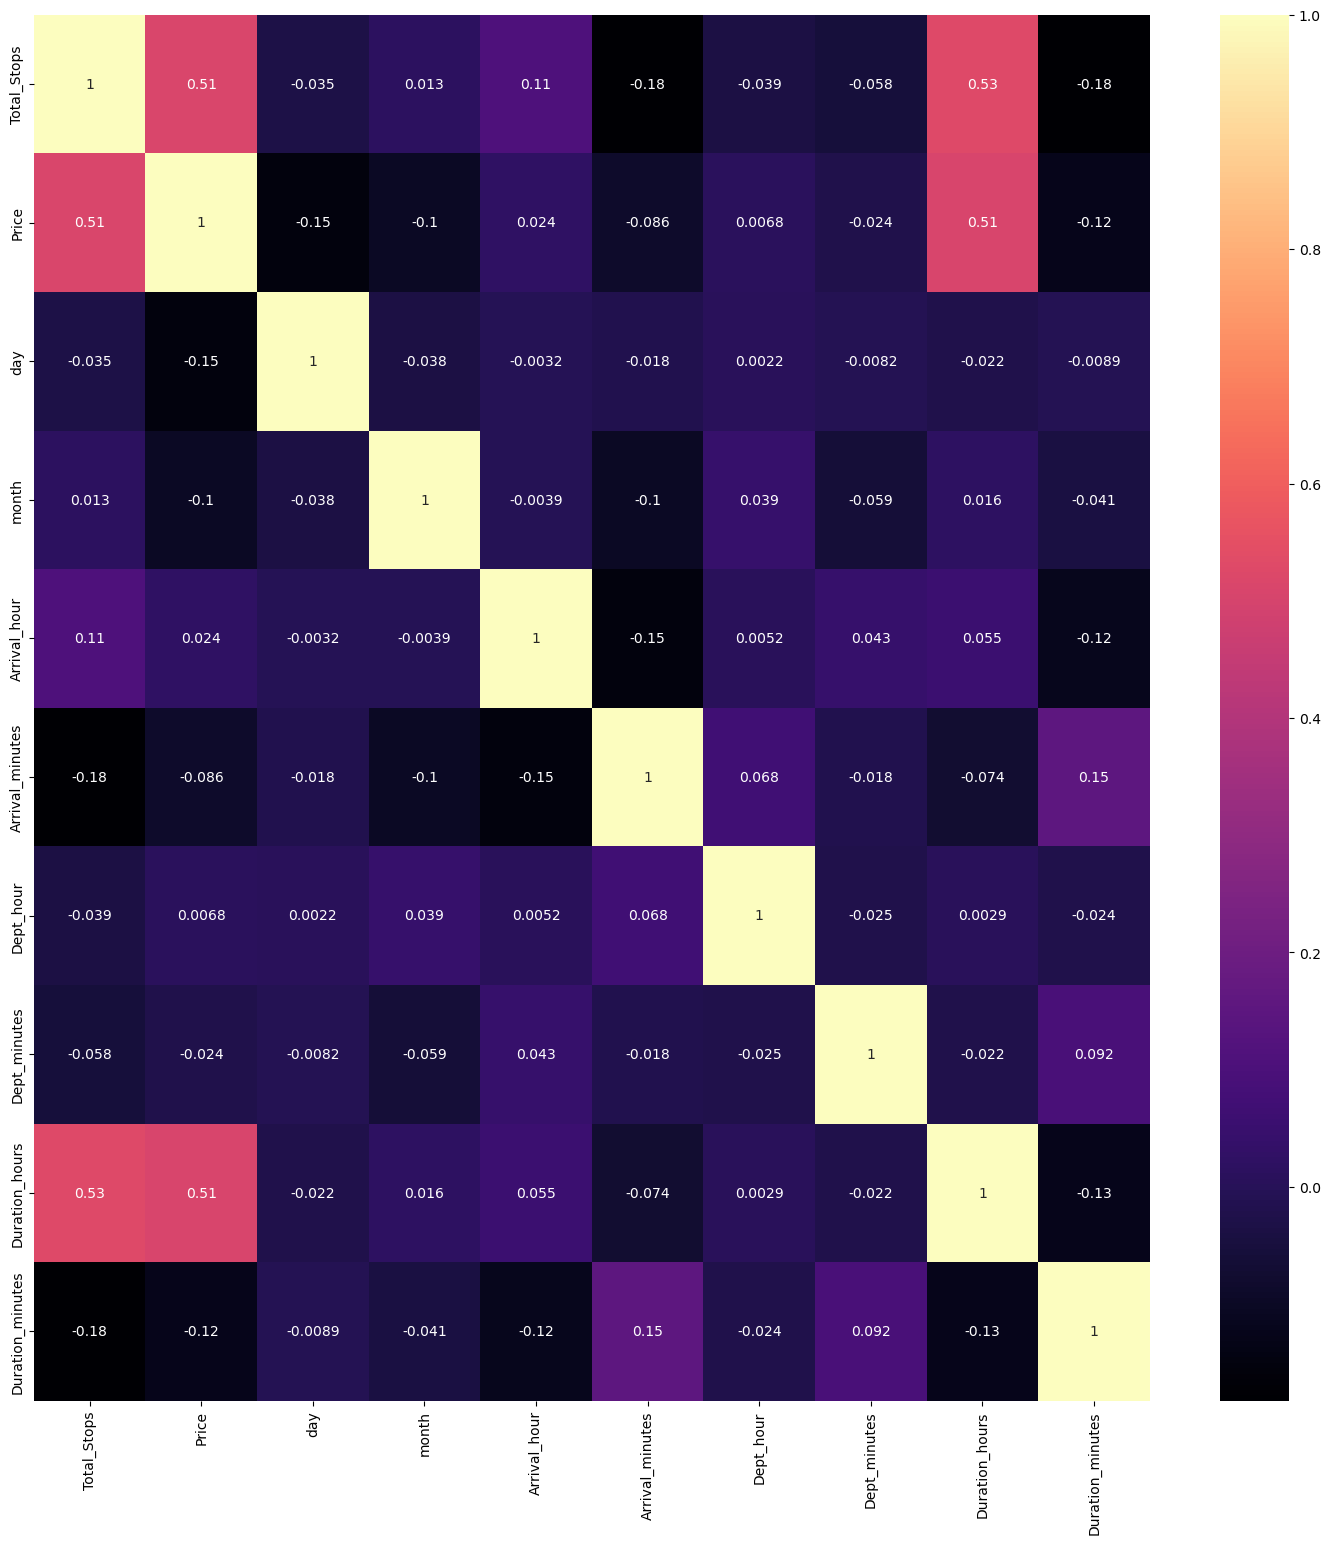

In [76]:
#find relation between independent and dependent attributes
#heatmap ************(learn it)

plt.figure(figsize=(18,18))
sns.heatmap(train_data.corr(), annot = True, cmap = "magma")
plt.show()

In [77]:
#extracting important features using 'ExtraTreesRegressor'

from sklearn.ensemble import ExtraTreesRegressor
select = ExtraTreesRegressor()
select.fit(X,Y)

ExtraTreesRegressor()

In [78]:
#selection_importances_
print(select.feature_importances_)

[2.24881752e-01 1.45178119e-01 5.14597913e-02 2.85246179e-02
 1.95394613e-02 2.39596969e-02 2.05816326e-02 1.27279245e-01
 1.69850934e-02 1.09053712e-02 2.36331866e-03 2.51297136e-02
 1.31081330e-01 6.77580227e-02 1.32301983e-02 7.75913206e-04
 3.70657329e-03 1.10188768e-04 4.33493954e-03 7.46018147e-05
 5.96758942e-04 1.49016778e-02 3.85690698e-03 5.98985798e-03
 1.15957424e-02 1.33669900e-02 6.15405322e-03 4.89710866e-04
 2.51887209e-02]


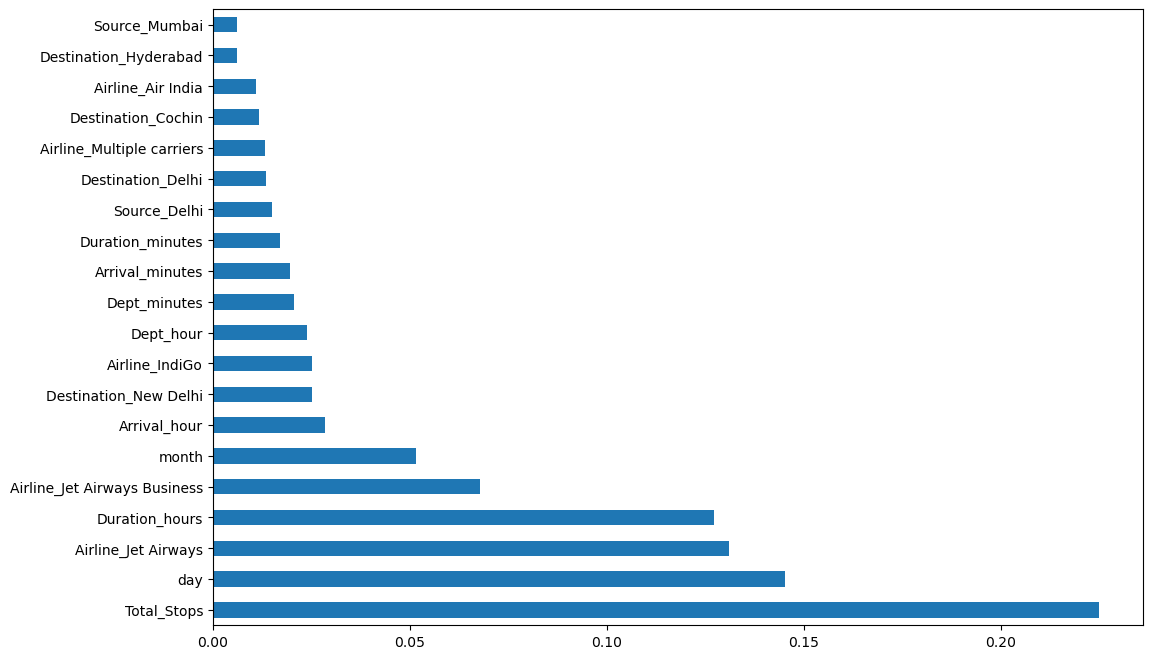

In [79]:
#plot graph of 'feature_importances_' for better visualization

plt.figure(figsize = (12,8))
fig_importances = pd.Series(select.feature_importances_, index=X.columns)
fig_importances.nlargest(20).plot(kind='barh')
plt.show()

# Fitting Model Using Random Forest
Split data into train and test so as to predict w.r.t. 'X_test'.

If needed do scaling of data a) scaling is not done in Random Forest

Import the model(which suits the data most or gives better results)
Fit training data into it

Predict w.r.t. 'X_test' (compare with 'Y_test')

In regression models check RMSE score

Plot final graphs

In [80]:
#import 'train_test_split' 
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [81]:
#import 'RandomForestRegressor'
from sklearn.ensemble import RandomForestRegressor
#abbrevate
RF_reg = RandomForestRegressor()
#fit training data into model
RF_reg.fit(X_train, Y_train)

RandomForestRegressor()

In [82]:
#predict Y using 'X_test'
Y_pred = RF_reg.predict(X_test)

In [83]:
#for training set
RF_reg.score(X_train, Y_train)

0.9528281541805291

In [84]:
#for testing set
RF_reg.score(X_test, Y_test)

0.7972036530167195

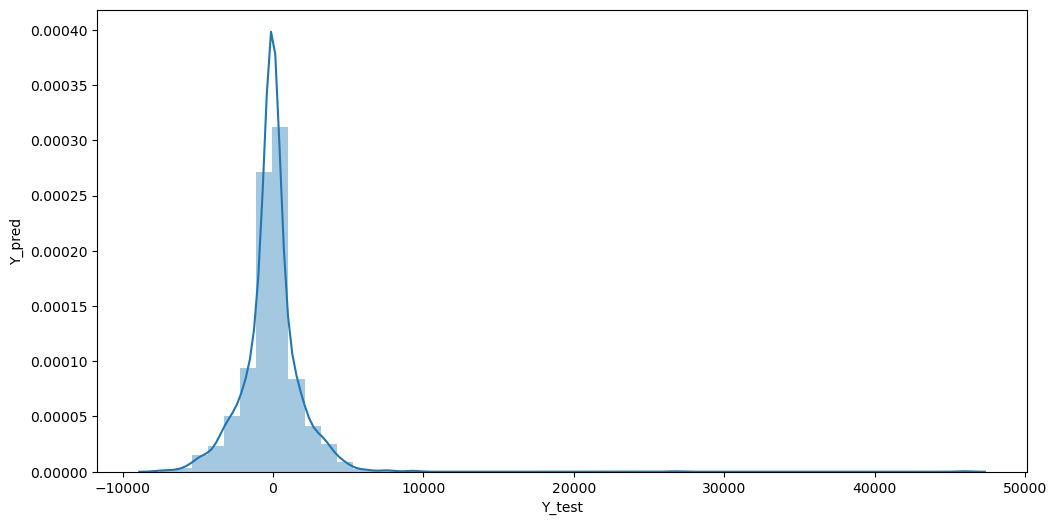

In [85]:
#plot between 'Y_test' and 'Y_pred'
sns.distplot(Y_test-Y_pred)
plt.xlabel('Y_test')
plt.ylabel('Y_pred')
plt.show()

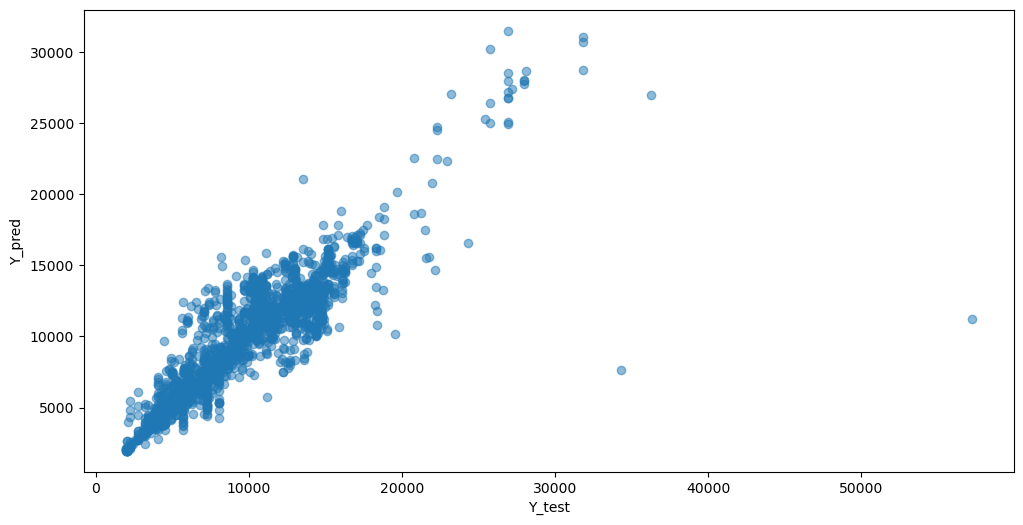

In [86]:
#scatter plot between 'Y_test' and 'Y_pred'
plt.scatter(Y_test, Y_pred, alpha=0.5)
plt.xlabel('Y_test')
plt.ylabel('Y_pred')
plt.show()

In [87]:
#import metrics
from sklearn import metrics

# calculate MAE, MSE, RMSE
print('MAE:', metrics.mean_absolute_error(Y_test, Y_pred))
print('MSE:', metrics.mean_squared_error(Y_test, Y_pred))
rmse = np.sqrt(metrics.mean_squared_error(Y_test, Y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(Y_test, Y_pred)))

MAE: 1176.8211626134876
MSE: 4372706.25598775
RMSE: 2091.1016847556098


In [88]:
# calculate RMSE/(max(DV)-min(DV))
rmse/(max(Y)-min(Y))

0.026894160800941567

In [89]:
# calculate r2_score
r2 = metrics.r2_score(Y_test, Y_pred)
print(r2)

0.7972036530167195


 ## Hyperparameter Tuning


* Choose following method for hyperparameter tuning
    1. **RandomizedSearchCV** --> Fast
    2. **GridSearchCV**
* Assign hyperparameters in form of dictionery
* Fit the model
* Check best paramters and best score

In [90]:
#Randomized Search CV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 100]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10]

In [91]:
# Create the random grid

random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

In [92]:
# Random search of parameters, using 5 fold cross validation, 
# search across 100 different combinations
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV, train_test_split
rf_random = RandomizedSearchCV(estimator = RF_reg, param_distributions = random_grid,scoring='neg_mean_squared_error', n_iter = 10, cv = 5, verbose=2, random_state=42, n_jobs = 1)

In [93]:
rf_random.fit(X_train, Y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   2.7s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   2.4s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   2.4s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   2.7s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   2.7s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=   3.7s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=   4.2s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimator

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [94]:
rf_random.best_params_


{'n_estimators': 700,
 'min_samples_split': 15,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 20}

In [95]:
prediction = rf_random.predict(X_test)


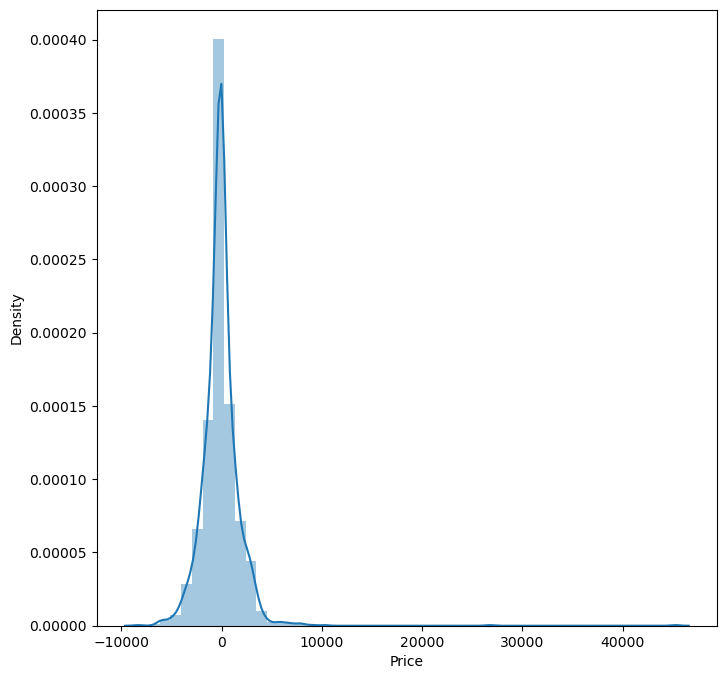

In [96]:
plt.figure(figsize = (8,8))
sns.distplot(Y_test-prediction)
plt.show()

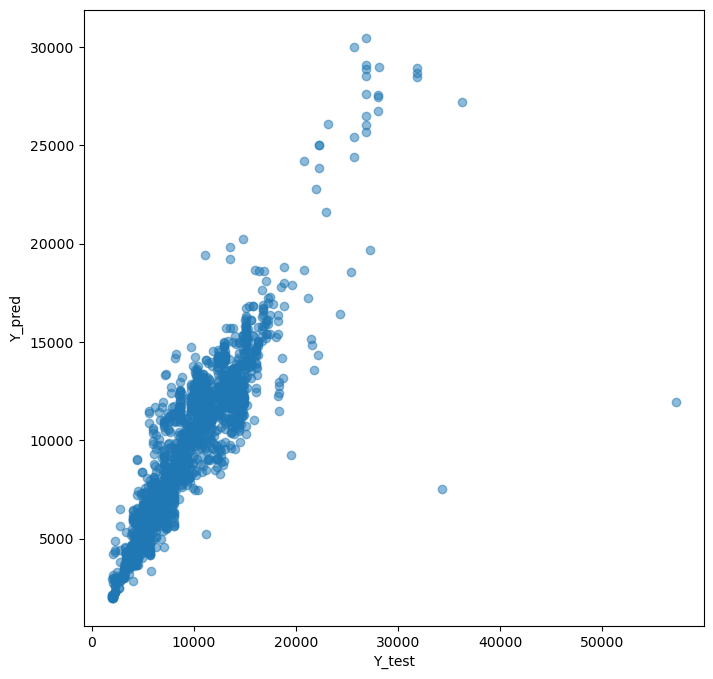

In [97]:
plt.figure(figsize = (8,8))
plt.scatter(Y_test, prediction, alpha = 0.5)
plt.xlabel("Y_test")
plt.ylabel("Y_pred")
plt.show()

In [98]:
print('MAE:', metrics.mean_absolute_error(Y_test, prediction))
print('MSE:', metrics.mean_squared_error(Y_test, prediction))
print('RMSE:', np.sqrt(metrics.mean_squared_error(Y_test, prediction)))

MAE: 1165.477725811473
MSE: 4046862.635515039
RMSE: 2011.681544259687


# Save model to reuse it again

In [99]:
import pickle
# open a file, where you ant to store the data
file = open('flight_rf.pkl', 'wb')

# dump information to that file
pickle.dump(rf_random, file)

In [100]:
model = open('flight_rf.pkl','rb')
forest = pickle.load(model)

In [101]:
Y_prediction = forest.predict(X_test)


In [102]:
metrics.r2_score(Y_test, Y_prediction)
#Conclusion:--> r2-value is increased

0.8123155521590838